# Simultaneous Localization and Mapping

SLAM gives you a way to track the location of a robot in the world in real-time and identify the locations of landmarks such as buildings, trees, rocks, and other world features

## Omega and Xi

To implement Graph SLAM, a matrix and a vector (omega and xi, respectively) are introduced. The matrix is square and labelled with all the robot poses (xi) and all the landmarks (Li). Every time you make an observation, for example, as you move between two poses by some distance dx and can relate those two positions, you can represent this as a numerical relationship in these matrices.

Below you can see a matrix representation of omega and a vector representation of xi.

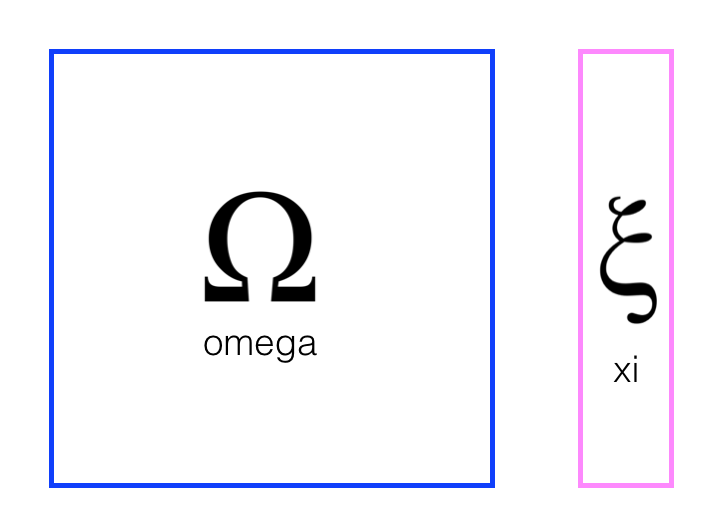

### Solving for x, L
To "solve" for all these poses and landmark positions, we can use linear algebra; all the positional values are in the vector <code>mu</code> which can be calculated as a product of the inverse of omega times xi.

### Quiz: Construct constraints for 3 motions and return `mu`
In the following example, you will complete the function call `mu_from_positions(-3, 5, 3)`, which takes in 3 robot poses/moves:

- initial pose: -3
- moves by 5
- moves by 3
In this function, you should construct the constraint matrices omega and `xi` and calculate `mu`. The final call should result in a `mu` of:

```
[[-3.0],
 [2.0],
 [5.0]]
 ```

## Constraint Updates

We will not consider landmark sensor measurements in this example, only robot poses.

#### Motion
When your robot moves by some amount `dx` update the constraint matrices as follows:
* Add `[[1, -1], [-1, 1]]` to omega at the indices for the intersection of `xt` and `xt+1`
* Add `-dx` and `dx` to xi at the rows for `xt` and `xt+1`

In [2]:
import numpy as np


def mu_from_positions(initial_pos, move1, move2):
    
    ## TODO: construct constraint matrices
    ## and add each position/motion constraint to them
    
    # Your code here
    
    
    
     # Number of poses
    n = 3
    
    # Initialize Omega and Xi
    omega = np.zeros((n, n))
    xi = np.zeros((n, 1))
    
    # Initial position constraint
    omega[0, 0] = 1
    xi[0, 0] = initial_pos
    
    # First move constraint (move1)
    omega[0, 0] += 1
    omega[0, 1] -= 1
    omega[1, 0] -= 1
    omega[1, 1] += 1
    
    xi[0, 0] -= move1
    xi[1, 0] += move1
    
    # Second move constraint (move2)
    omega[1, 1] += 1
    omega[1, 2] -= 1
    omega[2, 1] -= 1
    omega[2, 2] += 1
    
    xi[1, 0] -= move2
    xi[2, 0] += move2
    

    


    
    
    # display final omega and xi
    print('Omega: \n', omega)
    print('\n')
    print('Xi: \n', xi)
    print('\n')
    
    ## TODO: calculate mu as the inverse of omega * xi
    ## recommended that you use: np.linalg.inv(np.matrix(omega)) to calculate the inverse
    # Calculate mu as the inverse of omega times xi
    omega_inv = np.linalg.inv(omega)
    mu = np.dot(omega_inv, xi)
    

    return mu


In [4]:
# call function and print out `mu`
mu = mu_from_positions(-3, 5, 3)
print('Mu: \n', mu)

Omega: 
 [[ 2. -1.  0.]
 [-1.  2. -1.]
 [ 0. -1.  1.]]


Xi: 
 [[-8.]
 [ 2.]
 [ 3.]]


Mu: 
 [[-3.]
 [ 2.]
 [ 5.]]


## Updating Constraint Matrices

To implement Graph SLAM, a matrix and a vector (omega and xi, respectively) are introduced. The matrix is square and labelled with all the robot poses (xi) and all the landmarks (Li). Every time you make an observation, for example, as you move between two poses by some distance `dx` and can relate those two positions, you can represent this as a numerical relationship in these matrices.

Below you can see a matrix representation of omega and a vector representation of xi.

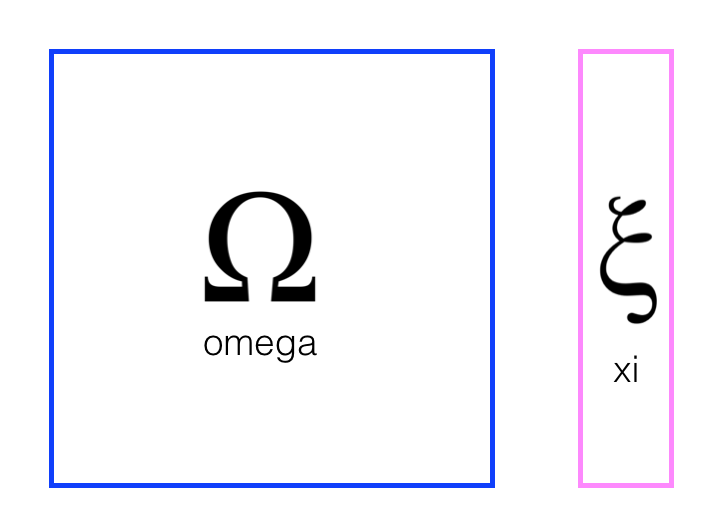

### Solving for x, L

To "solve" for all these poses and landmark positions, we can use linear algebra; all the positional values are in the vector `mu` which can be calculated as a product of the inverse of omega times xi.

---


### Constraint Updates

In the below code, we construct `omega` and `xi` constraint matrices, and update these according to landmark sensor measurements and motion.

#### Sensor Measurements

When you sense a distance, `dl`, between a pose and a landmark, l, update the constraint matrices as follows:
* Add `[[1, -1], [-1, 1]]` to omega at the indices for the intersection of `xt` and `l`
* Add `-dl` and `dl` to xi at the rows for `xt` and `l`

The values 2 instead of 1 indicate the "strength" of the measurement.

You'll see three new `dl`'s as new inputs to our function `Z0, Z1, Z2`, below.

#### Motion
When your robot moves by some amount `dx` update the constraint matrices as follows:
* Add `[[1, -1], [-1, 1]]` to omega at the indices for the intersection of `xt` and `xt+1`
* Add `-dx` and `dx` to xi at the rows for `xt` and `xt+1`

### QUIZ: Include three new sensor measurements for a single landmark, L.

In [5]:
import numpy as np


def mu_from_positions(initial_pos, move1, move2, Z0, Z1, Z2):
    
    ## TODO: construct constraint matrices
    ## and add each position/motion constraint to them
    
    # initialize constraint matrices with 0's
    # Now these are 4x4 because of 3 poses and a landmark
    omega = np.zeros((4,4))
    xi = np.zeros((4,1))
    
    # add initial pose constraint
    omega[0][0] = 1
    xi[0] = initial_pos
    
    # account for the first motion, dx = move1
    omega += [[1., -1., 0., 0.],
              [-1., 1., 0., 0.],
              [0., 0., 0., 0.],
              [0., 0., 0., 0.]]
    xi += [[-move1],
           [move1],
           [0.],
           [0.]]
    
    # account for the second motion
    omega += [[0., 0., 0., 0.],
              [0., 1., -1., 0.],
              [0., -1., 1., 0.],
              [0., 0., 0., 0.]]
    xi += [[0.],
           [-move2],
           [move2],
           [0.]]
    
    
    ## TODO: Include three new sensor measurements for the landmark, L
    
    # Your code here
    
    
    
    
     # Measurement Z0 from initial pose
    omega[0, 3] -= 1
    omega[3, 0] -= 1
    omega[3, 3] += 1
    
    xi[0] -= Z0
    xi[3] += Z0
    
    # Measurement Z1 from pose 1
    omega[1, 3] -= 1
    omega[3, 1] -= 1
    omega[3, 3] += 1
    
    xi[1] -= Z1
    xi[3] += Z1

    # Measurement Z2 from pose 2
    omega[2, 3] -= 1
    omega[3, 2] -= 1
    omega[3, 3] += 1
    
    xi[2] -= Z2
    xi[3] += Z2
    
    
    
    # display final omega and xi
    print('Omega: \n', omega)
    print('\n')
    print('Xi: \n', xi)
    print('\n')
    
    ## TODO: calculate mu as the inverse of omega * xi
    ## recommended that you use: np.linalg.inv(np.matrix(omega)) to calculate the inverse

    
    omega_inv = np.linalg.inv(np.matrix(omega))
    mu = omega_inv*xi
    return mu


In [6]:
# call function and print out `mu`
mu = mu_from_positions(-3, 5, 3, 10, 5, 2)
print('Mu: \n', mu)

Omega: 
 [[ 2. -1.  0. -1.]
 [-1.  2. -1. -1.]
 [ 0. -1.  1. -1.]
 [-1. -1. -1.  3.]]


Xi: 
 [[-18.]
 [ -3.]
 [  1.]
 [ 17.]]


Mu: 
 [[-7.45454545]
 [-1.09090909]
 [ 4.09090909]
 [ 4.18181818]]
